In [2]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np

from config import multi_run_results_file_path, MAX_CASE

In [3]:
def plot_results(filename):

    list_case = []
    list_tau_fixed = []
    list_tau_adaptive = []
    list_loss = []
    list_acc = []

    keys = []
    keys_adaptive = []

    with open(filename) as f:
        for line in f:

            l = line.replace('\n', '').split(',')

            type = l[0]
            simulation = l[1]
            case = l[2]
            tau_fixed = l[3]
            loss = l[4]
            accuracy = l[5]
            tau_adaptive = l[6]

            if (simulation != 'Simulation') and (type != 'centralized'):
                list_case.append(int(case))
                list_tau_fixed.append(int(tau_fixed))
                list_loss.append(float(loss))
                list_acc.append(float(accuracy))
                keys.append((int(case), int(tau_fixed)))

            if tau_fixed == '-1':
                list_tau_adaptive.append(float(tau_adaptive))
                keys_adaptive.append((int(case), int(tau_fixed)))

            if type == 'centralized':
                list_case.append(case)
                list_tau_fixed.append((tau_fixed))
                list_loss.append(float(loss))
                list_acc.append(float(accuracy))
                keys.append((case, tau_fixed))

    list_tau_fixed = list(set(list_tau_fixed))

    try:
        i = list_tau_fixed.index('nan')
        del list_tau_fixed[i]
    except:  # Exception if no centralized result exists
        pass
    list_tau_fixed = sorted([i for i in list_tau_fixed])


    def avg_over_simulations(keys, values, list_ref):
        i = iter(keys)
        j = iter(values)
        k = list(zip(i, j))
        intermediate = defaultdict(list)

        d = []
        for key, value in k:
            intermediate[key].append(value)
        for key, value in intermediate.items():
            d.append((key, sum(value) / len(value)))
        d = dict(d)

        # Centralized
        centralized = d.get(('None', 'nan'), None)
        ncase = list(range(0, MAX_CASE))
        case = []
        for i in range(0, len(ncase)):
            case.append([])
        for i in range(0, len(ncase)):
            for j in range(0, len(list_ref)):
                a = d.get((ncase[i], list_ref[j]), '')
                case[i].append(a)

        return [centralized, case]


    loss_centralized, avg_list_loss = avg_over_simulations(keys, list_loss, list_tau_fixed)
    accuracy_centralized, avg_list_acc = avg_over_simulations(keys, list_acc, list_tau_fixed)

    _, tauAvg = avg_over_simulations(keys_adaptive, list_tau_adaptive, list_tau_fixed)

    N_CASES = 4
    color_cases = ['blue', 'green', 'red', 'yellow']

    fixed_local_it_indexes = [i for i, x in enumerate(list_tau_fixed) if x > 0]
    adapt_local_it_indexes = [i for i, x in enumerate(list_tau_fixed) if x == -1]
    adapt_thres_local_it_indexes = [i for i, x in enumerate(list_tau_fixed) if x == -2]
    xaxis = [list_tau_fixed[i] for i in fixed_local_it_indexes]
    single_point = np.ones(len(xaxis))

    if len(adapt_thres_local_it_indexes) == 0:
        tauAvgIndex = 0
    else:
        tauAvgIndex = 1  # because -2 is less than -1

    plt.figure(1)
    for c in range(0, N_CASES):
        plt.semilogx(xaxis, [avg_list_loss[c][i] for i in fixed_local_it_indexes], label='Case' + str(c),
                     color=color_cases[c])
        plt.plot(tauAvg[c][tauAvgIndex], ([avg_list_loss[c][i] for i in adapt_local_it_indexes] * single_point)[0],
                 marker='o', markersize=8, color=color_cases[c])

    if loss_centralized is not None:
        plt.semilogx(xaxis, loss_centralized * single_point, '--', label='Centralized case', color='black')

    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=2, ncol=2, mode="expand", borderaxespad=0.)
    plt.xlabel('Value of \\tau')
    plt.ylabel('Loss function Value (on Training Data)')

    plt.figure(2)
    for c in range(0, N_CASES):
        plt.semilogx(xaxis, [avg_list_acc[c][i] for i in fixed_local_it_indexes], label='Case' + str(c),
                     color=color_cases[c])
        plt.plot(tauAvg[c][tauAvgIndex], ([avg_list_acc[c][i] for i in adapt_local_it_indexes] * single_point)[0],
                 marker='o', markersize=8, color=color_cases[c])

    if accuracy_centralized is not None:
        plt.semilogx(xaxis, accuracy_centralized * single_point, '--', label='Centralized case', color='black')

    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=2, ncol=2, mode="expand", borderaxespad=0.)
    plt.xlabel('Value of \\tau')
    plt.ylabel('Classification Accuracy (on Testing Data)')

    plt.show()

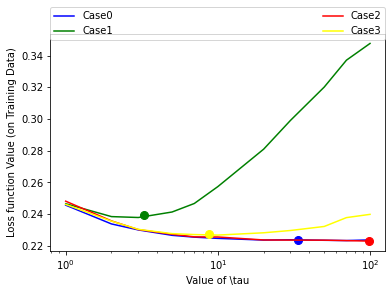

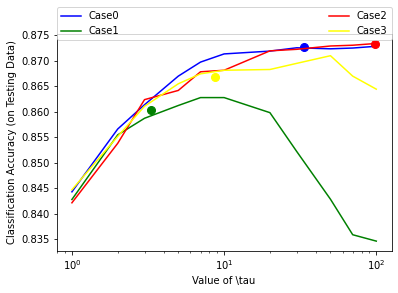

In [4]:
plot_results(multi_run_results_file_path)

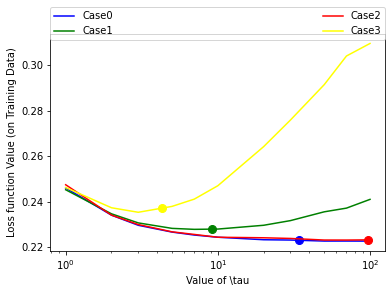

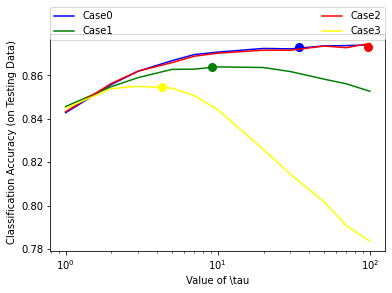

In [5]:
plot_results(multi_run_results_file_path)

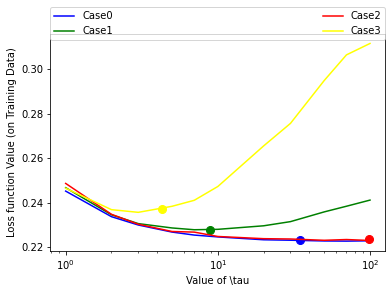

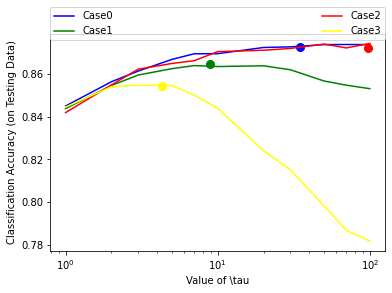

In [6]:
plot_results(multi_run_results_file_path)